# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 07**: Structured Streaming with Files 

**Date**: October 10th 2025

**Student Name**: Axel Escoto García

**Professor**: Pablo Camarillo Ramirez

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Lab 7: Structured Streming with files") \
    .master("spark://spark-master:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()
sc = spark.sparkContext
sc.setLogLevel("ERROR")

# Optimization (reduce the number of shuffle partitions)
spark.conf.set("spark.sql.shuffle.partitions", "5")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/10 08:03:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
!ls ../../data/
!pwd

airline  app.log  car_service  l7  mlops  witcher_network
/opt/spark/work-dir/labs/lab07


In [4]:
from axel2293.spark_utils import SparkUtils
from pyspark.sql.functions import regexp_extract, col, count

# Directorio donde se guardan los logs
logs_dir = "/opt/spark/work-dir/data/l7/"

# Definir esquema
logs_schema = SparkUtils.generate_schema([("log", "string")])

logs_raw = spark.readStream \
    .format("text") \
    .schema(logs_schema) \
    .load(logs_dir)

# Parse logs
logs_parsed = logs_raw \
    .withColumn("timestamp", regexp_extract(col("log"), r"^(\S+ \S+)", 1)) \
    .withColumn("level", regexp_extract(col("log"), r"\[(\w+)\]", 1)) \
    .withColumn("message", regexp_extract(col("log"), r"\] (.*)", 1)) \
    .drop("log")

# Filtrar solo errores
critical_logs = logs_parsed.filter(
    (col("level") == "ERROR")
)

# Escribir resultados en consola
q = critical_logs.writeStream \
    .outputMode("append") \
    .format("console") \
    .option("truncate", False) \
    .start()

q.awaitTermination(30)


-------------------------------------------
Batch: 0
-------------------------------------------
+---------+-----+-------+
|timestamp|level|message|
+---------+-----+-------+
+---------+-----+-------+

-------------------------------------------
Batch: 1
-------------------------------------------
+---------+-----+-------+
|timestamp|level|message|
+---------+-----+-------+
+---------+-----+-------+

-------------------------------------------
Batch: 2
-------------------------------------------
+-------------------+-----+------------------------------------+
|timestamp          |level|message                             |
+-------------------+-----+------------------------------------+
|2025-10-10 08:03:57|ERROR|User 'admin' logged in successfully.|
+-------------------+-----+------------------------------------+

-------------------------------------------
Batch: 3
-------------------------------------------
+---------+-----+-------+
|timestamp|level|message|
+---------+-----+-------

False

In [ ]:
"""
Create a script that generates random log entries (using Bash or Python).
This script should be included in your module under the lib directory.
"""
sc.stop()

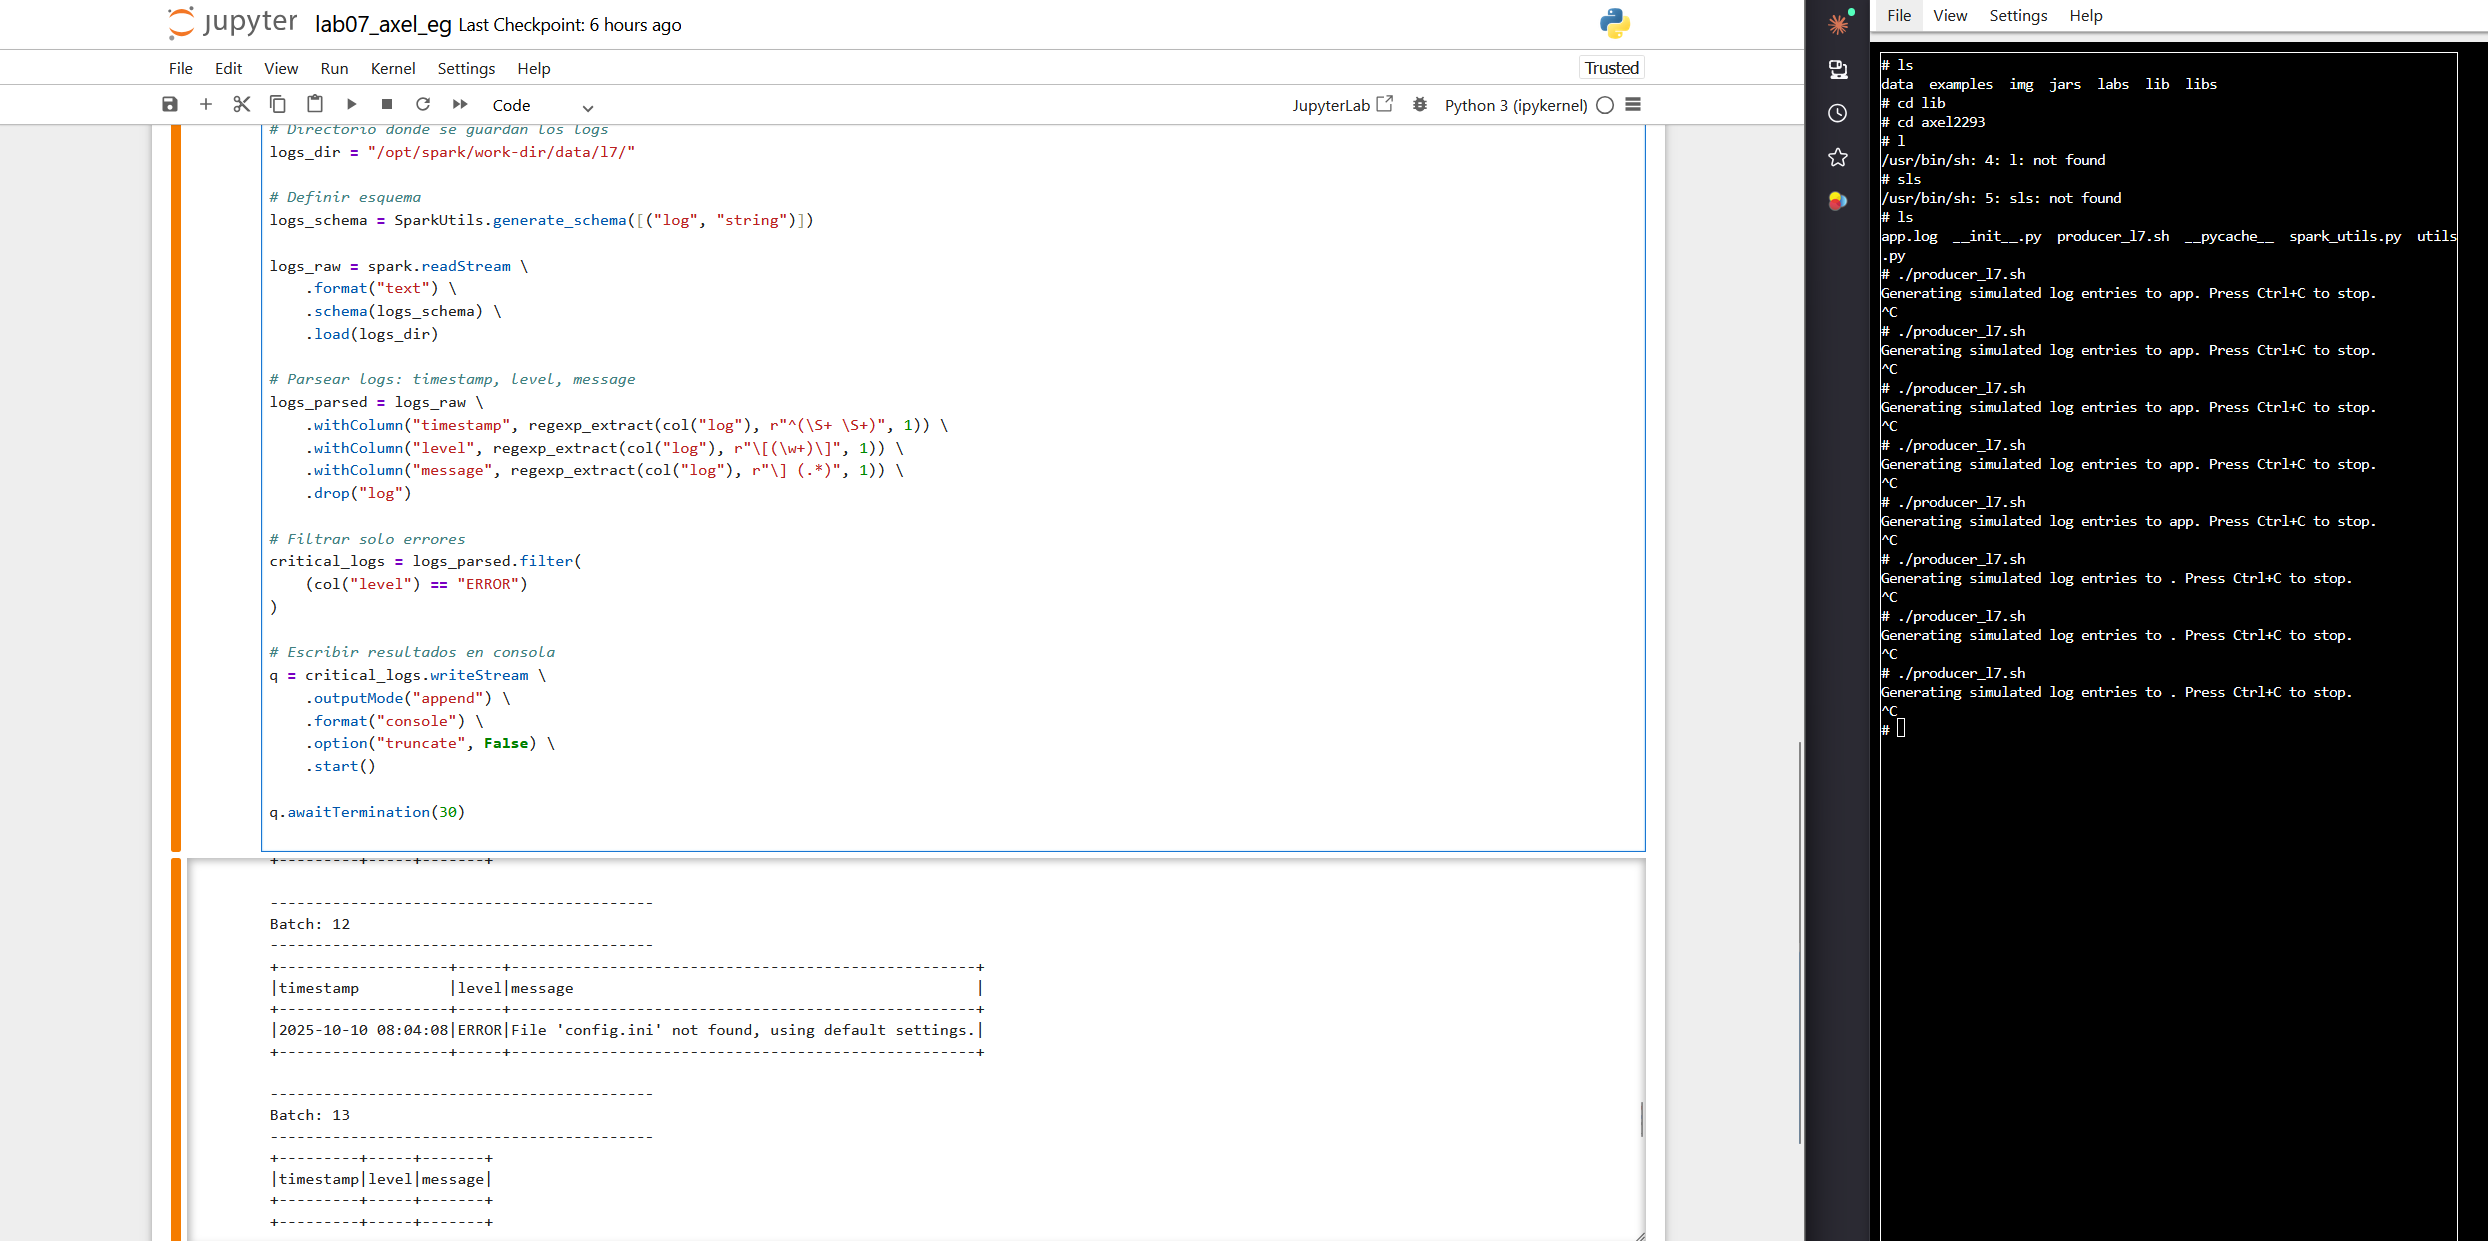